### Check http://pixelogik.github.io/NearPy/ for more information

In [1]:
%matplotlib inline

In [2]:
#!pip uninstall -y nearpy

# The version on pypy might have a bug?

# N = engine.neighbours(query,distance=EuclideanDistance())
# didn't work for me, but the source on github seems to work

In [3]:
import numpy

from nearpy import Engine
#from nearpy.hashes import RandomBinaryProjections
from nearpy.hashes import RandomDiscretizedProjections

from nearpy.filters import NearestFilter, UniqueFilter

from matplotlib import pyplot as plt
from nearpy.distances import EuclideanDistance

In [4]:
# Dimension of our vector space
dimension = 2

# Generate num_of_vectors random vectors
num_of_vectors = 1000
data=numpy.empty([dimension,num_of_vectors])
for index in range(num_of_vectors):
    data[:,index] = numpy.random.randn(dimension)+2.5

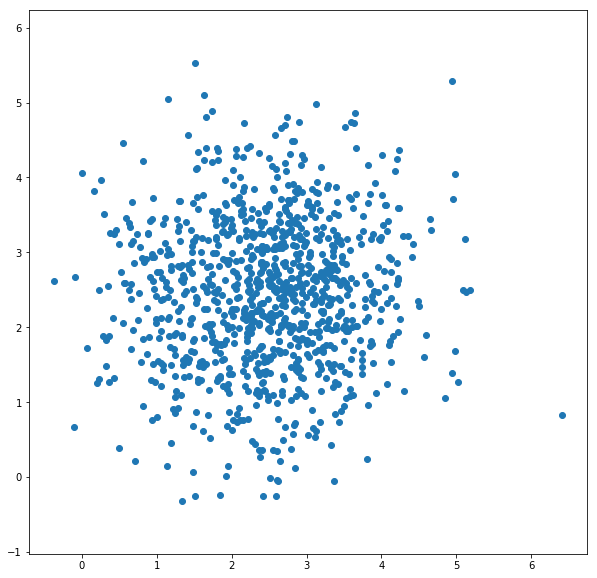

In [5]:
fig = plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.scatter(data[0,:],data[1,:])


In [6]:
# We are looking for the ten closest neighbours
nearest = NearestFilter(15)
# We want unique candidates
unique = UniqueFilter()


In [7]:
# Use four random 3-dim discretized projections

#make the bin_width bigger if you want more neighbour candidates
bin_width= .5

rdp1 = RandomDiscretizedProjections('rdp1', 4, bin_width)
rdp2 = RandomDiscretizedProjections('rdp2', 4, bin_width)
rdp3 = RandomDiscretizedProjections('rdp3', 4, bin_width)
rdp4 = RandomDiscretizedProjections('rdp4', 4, bin_width)

# Create engine with this configuration
engine = Engine(dimension, lshashes=[rdp1, rdp2, rdp3, rdp4], distance=EuclideanDistance(), vector_filters=[unique, nearest])


*** engine init done ***


In [8]:
#help(RandomDiscretizedProjections)
#help(RandomBinaryProjections)
#help(Engine)

In [9]:
index=17
print(data[:,index])
print(rdp1.hash_vector(data[:,index]))
print(rdp2.hash_vector(data[:,index]))
print(rdp3.hash_vector(data[:,index]))
print(rdp4.hash_vector(data[:,index]))


[2.93253868 1.8492857 ]
['-3_-4_2_-5']
['6_8_10_2']
['-1_1_-1_2']
['-15_-8_-5_2']


In [10]:
# Index num_of_vectors random vectors (set their data to a unique string)
for index in range(num_of_vectors):
    v = data[:,index]
    engine.store_vector(v, 'data_%d' % index)                    

In [11]:
# Create random query vector
query = numpy.random.randn(dimension)+2.5
query = [4,4]
print(query)

[4, 4]


In [12]:
engine.candidate_count(query)

Bucket -4_-2_4_-6 size 8
Bucket 10_17_15_2 size 0
Bucket -5_1_0_4 size 4
Bucket -18_-8_-7_5 size 1


13

In [13]:
# Get nearest neighbours
N = engine.neighbours(query,distance=EuclideanDistance())
len(N)

Bucket -4_-2_4_-6 size 8
Bucket 10_17_15_2 size 0
Bucket -5_1_0_4 size 4
Bucket -18_-8_-7_5 size 1


11

In [16]:
#help(engine.neighbours)

In [14]:
N

[(array([3.91065064, 3.92037515]), 'data_534', 0.11968051068726612),
 (array([4.18075756, 4.08975013]), 'data_897', 0.20181273563843805),
 (array([4.00617345, 3.75952281]), 'data_494', 0.24055641751643628),
 (array([3.82553363, 4.16598068]), 'data_996', 0.24080718702942305),
 (array([3.84709481, 3.77622493]), 'data_761', 0.271026341663114),
 (array([4.01316873, 4.30068434]), 'data_901', 0.3009725747579474),
 (array([4.05013725, 3.63197237]), 'data_659', 0.37142708241439193),
 (array([4.06055531, 3.63256801]), 'data_737', 0.3723885242081609),
 (array([3.82547112, 3.65760156]), 'data_558', 0.384313703523672),
 (array([3.61455315, 3.59776101]), 'data_872', 0.5571045495348547),
 (array([3.75289708, 3.48302627]), 'data_342', 0.5729936190285285)]

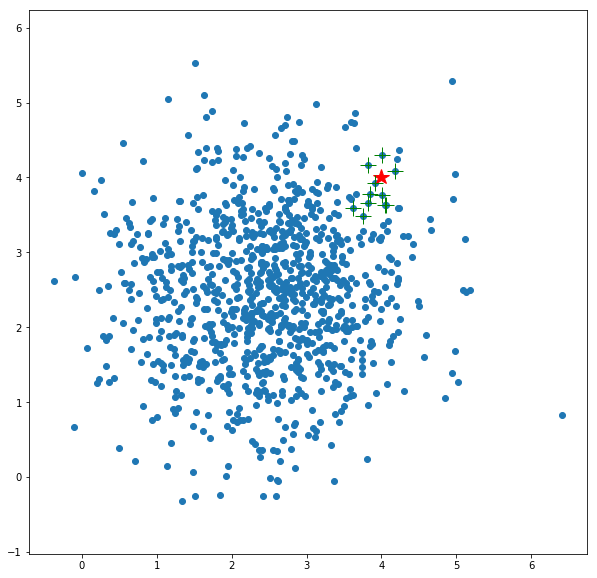

In [15]:
fig = plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.scatter(data[0,:],data[1,:])

plt.plot(query[0],query[1],'r*', markersize=16)
for iter in range(len(N)):
    #plt.plot(N[iter][0][0],N[iter][0][1],'g*', markersize=16)
    index=int(N[iter][1].split('_')[1])
    plt.plot(data[0,index],data[1,index],'g+', markersize=16)
